<a href="https://colab.research.google.com/github/sellauno/machinelearning/blob/main/Kuis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Sella Novanda

Kelas : TI-4J

NIM : 2241727030

In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [4]:
from google.colab import drive
import io

drive.mount('/content/drive')
url = '/content/drive/MyDrive/Kuliah/dataset_quiz.csv'

df = pd.read_csv(url)

df.head()

Mounted at /content/drive


,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [5]:
df.isnull().sum()

id_ketua               3
id_anggota1            5
id_anggota2            4
id_anggota3            3
id_anggota4           13
id_anggota5           84
keterlibatan_vltr      0
jml_vltr_terlibat      0
tahun                  0
skema                  0
luaran_hki             0
jenis_luaran_hki       0
potensi_hki            0
luaran_lain            0
jenis_luaran_lain      0
status_luaran_lain     0
dtype: int64

In [6]:
df.fillna(0)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.0,9303.0,0.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,9007.0,0.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
82,8601.0,8903.0,8703.0,0.0,0.0,0.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,6204.0,0.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [7]:
gruptahun = df.groupby('tahun').sum()
gruptahun.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,jml_vltr_terlibat
tahun,,,,,,,
2019,138890.0,142679.0,153786.0,148845.0,156456.0,0.0,0
2020,171605.0,170553.0,188988.0,189085.0,168368.0,8812.0,39
2021,135183.0,138061.0,138218.0,148081.0,138214.0,0.0,26
2022,206623.0,201200.0,188555.0,204351.0,154174.0,0.0,49


Line Plot

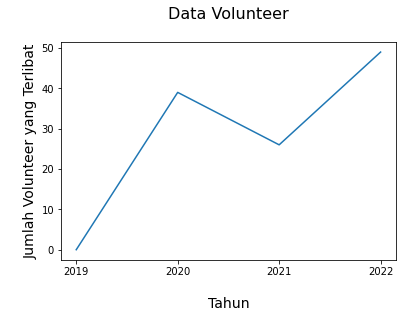

In [8]:
import matplotlib.pyplot as plt
tahun = ['2019', '2020', '2021', '2022']
plt.plot(tahun, gruptahun['jml_vltr_terlibat'])

plt.title('Data Volunteer\n', size=16)
plt.ylabel('\nJumlah Volunteer yang Terlibat', size=14)
plt.xlabel('\nTahun', size=14)
plt.show()

Scatter Plot

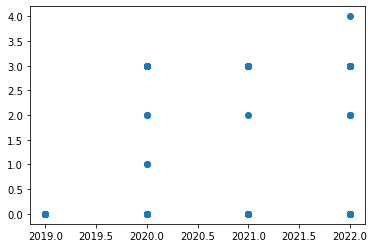

In [9]:
plt.scatter(df['tahun'], df['jml_vltr_terlibat'])
plt.show()


Bar plot

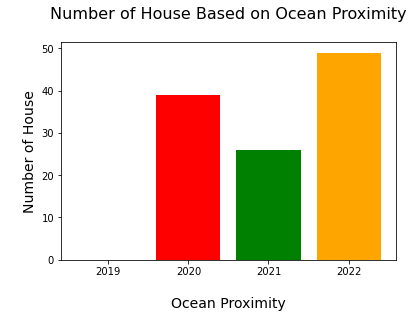

In [10]:
plt.bar( ['2019', '2020', '2021', '2022'], gruptahun['jml_vltr_terlibat'], color=['royalblue','red','green', 'orange'])

plt.xlabel('\nOcean Proximity', size=14)
plt.ylabel('\nNumber of House', size=14)
plt.title('Number of House Based on Ocean Proximity\n', size=16)
plt.show()

Box plot

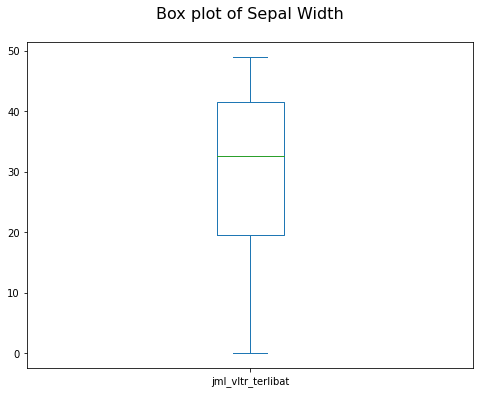

In [11]:
# create box plot
gruptahun['jml_vltr_terlibat'].plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Sepal Width\n', size=16)
plt.show()

Histogram

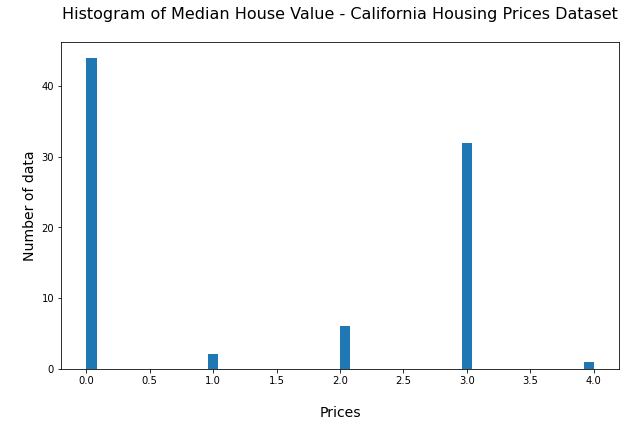

In [12]:
df['jml_vltr_terlibat'].plot(kind='hist', figsize=(10, 6), bins=50)

plt.title('Histogram of Median House Value - California Housing Prices Dataset\n', size=16)
plt.ylabel('\nNumber of data', size=14)
plt.xlabel('\nPrices', size=14)
plt.show()

Data Training & Testing

In [ ]:
# Replace
df = df.replace(to_replace=['TIDAK ADA', 'TIDAK'], value=[0, 0]) ('TIDAK ADA',0, regex=True)
df['keterlibatan_vltr'].replace('TIDAK',0,inplace=True)
df['keterlibatan_vltr'].replace('YA',1,inplace=True)
df['skema'].replace('REGULAR',0,inplace=True)
df['skema'].replace('KEMITRAAN',1,inplace=True)
df['luaran_hki'].replace('ADA',1,inplace=True)
df['jenis_luaran_hki'].replace('Hak Cipta',1,inplace=True)
df['potensi_hki'].replace('TIDAK',0,inplace=True)
df['potensi_hki'].replace('YA',1,inplace=True)
df['potensi_hki'].replace('DRAFT',2,inplace=True)
df['potensi_hki'].replace('SUDAH',3,inplace=True)
df['luaran_lain'].replace('YA',1,inplace=True)
df['jenis_luaran_lain'].replace('Publikasi Media Massa',1,inplace=True)
df['jenis_luaran_lain'].replace('Artikel Ilmiah',2,inplace=True)
df['jenis_luaran_lain'].replace('Modul Ajar',3,inplace=True)
df['status_luaran_lain'].replace('Draft',1,inplace=True)
df['status_luaran_lain'].replace('Terpublikasi',2,inplace=True)

In [86]:
df = df.replace(to_replace=['TIDAK ADA', 'TIDAK'], value=[0, 0])
df['keterlibatan_vltr'].replace(to_replace=['YA'], value=[1])
df['skema'].replace(to_replace=['REGULAR', 'KEMITRAAN'], value=[0, 1])
df['luaran_hki'].replace(to_replace=['ADA'], value=[1])
df['jenis_luaran_hki'].replace(to_replace=['Hak Cipta'], value=[1])
df['potensi_hki'].replace(to_replace=['TIDAK', 'YA', 'DRAFT', 'SUDAH'], value=[0, 1, 2, 3])
df['luaran_lain'].replace(to_replace=['YA'], value=[1])
df['jenis_luaran_lain'].replace(to_replace=['Publikasi Media Massa', 'Artikel Ilmiah', 'Modul Ajar'], value=[1, 2, 3])
df['status_luaran_lain'].replace(to_replace=['Draft', 'Terpublikasi'], value=[1, 2])

df.fillna(0)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,0,0,2019,1,0,0,0,0,0,0
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,0,0,2019,1,0,0,0,0,0,0
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,0,0,2019,1,0,0,0,0,0,0
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,0,0,2019,1,0,0,0,0,0,0
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,0,0,2019,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.0,9303.0,0.0,1,3,2022,1,0,0,0,0,0,0
81,6211.0,8901.0,9003.0,9303.0,9007.0,0.0,1,3,2022,1,0,0,0,0,0,0
82,8601.0,8903.0,8703.0,0.0,0.0,0.0,1,3,2022,1,0,0,0,0,0,0
83,8703.0,8601.0,9202.0,9102.0,6204.0,0.0,1,3,2022,1,0,0,0,0,0,0


In [145]:
kolom_X = ['jml_vltr_terlibat','tahun','skema','luaran_hki','jenis_luaran_hki','potensi_hki','luaran_lain','jenis_luaran_lain','status_luaran_lain']
X = df[kolom_X].values
y = df['keterlibatan_vltr'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train.shape, y_train.shape
X_test.shape, y_test.shape


((17, 9), (17,))

In [88]:
X_train
y_train

array(['0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1',
       '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1',
       '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0',
       '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0',
       '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0',
       '0', '1', '1'], dtype=object)

Klasifikasi

Naive Bayes

In [89]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9705882352941176
Hasil akurasi data test: 0.9411764705882353


Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6, random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(y_pred[0:8])

['0' '0' '0' '0' '0' '0' '1' '1']


In [91]:
from sklearn.metrics import accuracy_score

# Memprediksi test set labels
y_pred = dt.predict(X_test)

#  menghitung set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 1.00


Support Vector Machine 

In [25]:
from scipy import stats
import seaborn as sns

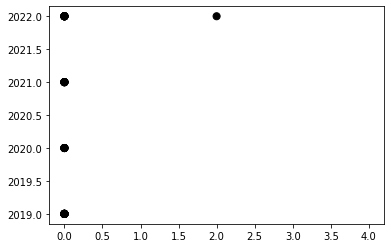

In [35]:
from sklearn.datasets import make_blobs

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Prediksi

In [ ]:
# training model
#dataFrame = df.sum(axis = 1)

kolom_Xnew = ['jml_vltr_terlibat','skema','luaran_hki','jenis_luaran_hki','potensi_hki','luaran_lain','jenis_luaran_lain','status_luaran_lain']
dataFrame = pd.get_dummies(df, kolom_Xnew, drop_first=True)

import statsmodels.api as sm

X_train_sm = sm.add_constant(dataFrame) 

# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

Confusion Matrix & ROC

In [104]:
from sklearn import svm
classifier = svm.SVC(kernel='linear', probability=True, verbose=True)

In [105]:
classifier.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

In [106]:
y_preds = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

In [107]:
y_proba = y_proba[:,1].reshape((y_proba.shape[0],))

In [109]:
y_proba[:8], y_preds[:8], y_test[:8]

(array([5.42157226e-02, 7.93755153e-02, 3.73813365e-04, 7.33310386e-04,
        6.07174890e-03, 1.20897578e-02, 4.71632984e-01, 6.80851854e-02]),
 array(['0', '0', '0', '0', '0', '0', '1', '0'], dtype=object),
 array(['0', '0', '0', '0', '0', '0', '1', '1'], dtype=object))

In [111]:
from sklearn import metrics
import itertools
conf = metrics.confusion_matrix(y_test, y_preds)
conf

array([[11,  0],
       [ 2,  4]])

In [112]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [113]:
conf = get_confusion_matrix(y_test, y_preds)
conf

array([[11,  0],
       [ 2,  4]])

Text(0.5, 15.0, 'Predicted label')

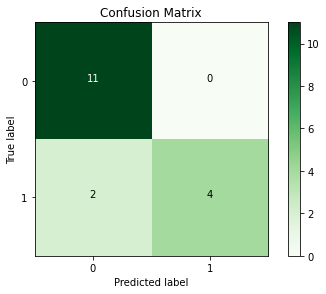

In [114]:
classes = [0, 1]

plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [115]:
def get_roc_curve(y_test, y_proba, delta=0.1):

    thresh = list(np.arange(0, 1, delta)) + [1]
    TPRs = []
    FPRs = []
    y_pred = np.empty(y_proba.shape)
    for th in thresh:
        y_pred[y_proba < th] = 0
        y_pred[y_proba >= th] = 1
        
        
        (TN, FP), (FN, TP) = get_confusion_matrix(y_test, y_pred)
        
        TPR = TP / (TP + FN)  # sensitivity
        FPR = FP / (FP + TN)  # 1 - specificity
        TPRs.append(TPR)
        FPRs.append(FPR)
    return FPRs, TPRs, thresh

In [116]:
delta = 0.001
FPRs, TPRs, _ = get_roc_curve(y_test, y_proba, delta)

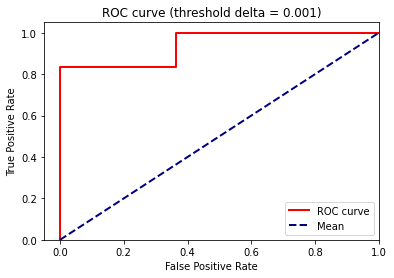

In [117]:
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve (threshold delta = {delta})')
plt.legend(loc="lower right")
plt.show()

In [118]:
rand_proba = np.random.random(size=(y_proba.shape))
rand_proba[:5] 

array([8.89986922e-01, 6.88789862e-01, 1.87152834e-01, 5.24844852e-01,
       4.64341863e-05])

In [119]:
FPRs, TPRs, _ = get_roc_curve(y_test, rand_proba, delta)  

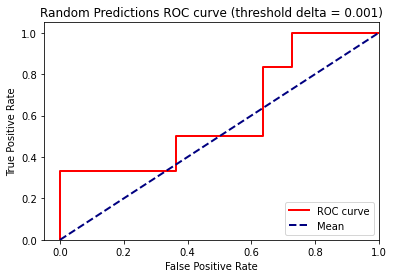

In [120]:
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Random Predictions ROC curve (threshold delta = {delta})')
plt.legend(loc="lower right")
plt.show()

In [124]:
X =df.iloc[:, 2:]
y =df['keterlibatan_vltr']

X.head()

,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,6211.0,8602.0,7801.0,NaN,0,0,2019,1,0,0,0,0,0,0
1,8402.0,7903.0,9202.0,NaN,0,0,2019,1,0,0,0,0,0,0
2,8701.0,9101.0,9003.0,NaN,0,0,2019,1,0,0,0,0,0,0
3,8602.0,8903.0,8903.0,NaN,0,0,2019,1,0,0,0,0,0,0
4,5911.0,5903.0,8402.0,NaN,0,0,2019,1,0,0,0,0,0,0


In [127]:
from sklearn.model_selection import RepeatedKFold

# inisiasi repated k-fold
cv =RepeatedKFold(n_splits=4, n_repeats=3, random_state=42)

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# inisiasi model
dt = DecisionTreeClassifier()

# Definisikan hyperparameter yang akan digunakan
# sklearn menerima dalam bentuk dictionary
# nama hyperparamater HARUS SESUAI dengan dokumentasi sklearn
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(5,11))
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
grid = GridSearchCV(dt, param_grid=params, cv=cv)

# Fit / latih berdasarkan grid
# %timeit merupakan magic command didalam ipython notebook
# yang dapat kita gunakan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur
%timeit grid.fit(X, y)

# Evaluasi dengan score
score =grid.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {grid.best_params_}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mes

282 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'criterion': 'gini', 'max_depth': 5}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mes